# Python Homework

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)


## Submission Instructions

Solve each of the problems described below. When you are done, print your Jupyter 
notebook into a PDF file from your browser. Keep your files (including this notebook 
file and a copy of your PDF file) in your Dropbox course folder. Upload only the pdf 
file on Blackboard.

## `bmicategory()` [function, if/switch] [10pt]

Write a function `bmicategory()` that returns a dictionary of the Body mass 
index (bmi) value and category for a given height/weight combination. Body mass 
index is defined as follows:
$$
BMI=\frac{weight(lb)*4.88}{(height(ft))^2}
$$

and the BMI categories are defined as the following:

| CATEGORY                     |  BMI          |
|:-----------------------------|:--------------|
|Very severely underweight     |less than 15 |
|Severely underweight          |from 15 (including 15) to 16 |
|Underweight                   |from 16 (including 16) to 18.5 |
|Normal                        |from 18.5 (including 18.5) to 25 |
|Overweight                    |from 25 (including 25) to 30 |
|Moderately obese              |from 30 (including 30) to 35 |
|Severely obese                |from 35 (including 35) to 40 |
|Very severely obese           |over 40 (including 40) |


Below is an example call and the expected output from your function.

```bash
>> bmicategory( 7, weight=170 )

{'bmi': 16.9306, 'category': 'Underweight'}
```

In [1]:
# Define your function below:
def bmicategory(height: float, weight: float):
    """
    Compute the BMI for a given height-weight combination and assign a 
    category.
    """

    # Check for valid input
    assert height > 0, "height must be greater than 0"
    assert weight > 0, "weight must be greater than 0"

    # Compute BMI
    output = dict(bmi = round(weight * 4.88 / height**2, 4))

    # Assign category
    if output['bmi'] < 15:
        output['category'] = 'Very severely underweight'
    elif output['bmi'] < 16:
        output['category'] = 'Severely underweight'
    elif output['bmi'] < 18.5:
        output['category'] = 'Underweight'
    elif output['bmi'] < 25:
        output['category'] = 'Normal'
    elif output['bmi'] < 30:
        output['category'] = 'Overweight'
    elif output['bmi'] < 35:
        output['category'] = 'Moderately obese'
    elif output['bmi'] < 40:
        output['category'] = 'Severely obese'
    else:
        output['category'] = 'Very severely obese'

    return output


#==============================================================================
print('Test Case 1: height=7ft, weight=170lb', end='\n\t')
print( bmicategory( 7, weight=170 ) ) 

print('Test Case 2: height=6ft, weight=290lb', end='\n\t')
print( bmicategory( 6, weight=290 ) )

print('Test Case 3: height=5.5ft, weight=200lb', end='\n\t')
print( bmicategory( 5.5, weight=200 ) )

Test Case 1: height=7ft, weight=170lb
	{'bmi': 16.9306, 'category': 'Underweight'}
Test Case 2: height=6ft, weight=290lb
	{'bmi': 39.3111, 'category': 'Severely obese'}
Test Case 3: height=5.5ft, weight=200lb
	{'bmi': 32.2645, 'category': 'Moderately obese'}


## `getprostaterisk()`  [function, if]  [10pt]

Write a function that implements the decision tree for prostate cancer risk, as described 
in Figure 3 of "Decision Tree-Based Modeling of Androgen Pathway Genes and Prostate Cancer 
Risk", Cancer Epidemiol Biomarkers Prev. 2011 Jun; 20(6): 1146–1155. The figure is also 
given below. The numbers within each node indicate #controls/#prostate-cancer cases. 

- Your function needs to have an input argument for each variable being tested. 
- Your function should calculate and return #prostate/(#numprostate + #control). 
- You need to decide for yourself what input arguments should be given to this function. 
- One should be able to use your function to obtain the Prostate Risk value for a new patient. 
- Demonstrate your function with three test cases that fall under separate nodes in the decision tree.

<img src='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3111844/bin/nihms288508f3.jpg'>

In [ ]:
# Define your function below:
def getprostaterisk(
    history: bool, 
    euro_ances: float, 
    repeat: int, 
    haplotype: str
) -> float:
    """
    Compute the risk of prostate cancer using factors identified in "Decision 
    Tree-Based Modeling of Androgen Pathway Genes and Prostate Cancer Risk", 
    Cancer Epidemiol Biomarkers Prev. 2011 Jun; 20(6): 1146-1155
    """

    # Check for invalid inputs
    assert isinstance(history, bool), "history must either be True or False"
    assert 0 <= euro_ances <= 1, "euro_ances must be between 0 and 1"
    assert isinstance(repeat, int), "repeat must be an integer"
    assert isinstance(haplotype, str), \
        "haplotype must be one of 'AA', 'AG', 'GG', or 'GG'"
    haplotype = haplotype.upper()

    # Compute risk
    if history:
        if euro_ances >= 0.204:
            if haplotype in ['GA', 'AG', 'GG']:
                return 14 / (7 + 14)
            else:
                return 3 / (10 + 3)
        else:
            if repeat < 16:
                return 7 / (4 + 7)
            else:
                return 19 / (38 + 19)
    else:
        return 110 / (343 + 110)


#==============================================================================
# Add your test cases below:

# This test case should print 110/453 = 0.2428
print("Test Case 1: history=False, euro_ances=0.8, repeat=12, halotype='GG'")
print( f"\tRisk = {getprostaterisk(False, 0.8, 12, 'GG'):.4f}" )

# This test case should print 19/57 = 0.3333
print("Test Case 2: history=True, euro_ances=0.1, repeat=16, halotype='AA'")
print( f"\tRisk = {getprostaterisk(True, 0.1, 16, 'AA'):.4f}" )

# This test case should print 7/11 = 0.6364
print("Test Case 3: history=True, euro_ances=0.1, repeat=10, halotype='AA'")
print( f"\tRisk = {getprostaterisk(True, 0.1, 10, 'AA'):.4f}" )

# This test case should print 3/13 = 0.2308
print("Test Case 4: history=True, euro_ances=0.8, repeat=12, halotype='AA'")
print( f"\tRisk = {getprostaterisk(True, 0.8, 12, 'AA'):.4f}" )

# This test case should print 14/21 = 0.6667
print("Test Case 5: history=True, euro_ances=0.5, repeat=16, halotype='GA'")
print( f"\tRisk = {getprostaterisk(True, 0.5, 16, 'GA'):.4f}" )

Test Case 1: history=False, euro_ances=0.8, repeat=12, halotype='GG'
	Risk = 0.2428
Test Case 2: history=True, euro_ances=0.1, repeat=16, halotype='AA'
	Risk = 0.3333
Test Case 3: history=True, euro_ances=0.1, repeat=10, halotype='AA'
	Risk = 0.6364
Test Case 4: history=True, euro_ances=0.8, repeat=12, halotype='AA'
	Risk = 0.2308
Test Case 5: history=True, euro_ances=0.5, repeat=16, halotype='GA'
	Risk = 0.6667


: 

# `knearestneighbors()`  [function, list, for, if]  [20pt]

Write a function knearestneighbors(v, x, k) that takes a list of numbers v, and a number x; 
and returns the list of k numbers in v that are are nearest to x.  The list of numbers you 
return should be ordered according to how close they are to x (with the closest one listed 
first). If v has fewer entries than k, then return all numbers in v as the answer. If the 
argument k is not given, use k=3.

You may search for and use functions available in basic Python and/or in numpy. Using 
numpy is not required, but may simplify some of the tasks.

In [ ]:
# Modify the template function given below:
def knearestneighbors(v: list, x: float, k: int=3) -> list:
    """
    Find the k nearest neighbors of x in the list x
    """

    # Check for invalid inputs
    assert isinstance(v, list), "x must be a list"
    assert k > 0, "k must be greater than 0"

    # Find the k nearest neighbors
    neighbors = sorted(v, key=lambda y: abs(y - x))[:k] 

    return neighbors


#==========================================================================================
# Do not change the test cases below
# After you complete the knearestneighbors() function above, run this Cell to produce the output.


# This test case should print: [73 77]
print( knearestneighbors([73,90,99,77,59], 70, 2 ) )

# This test case should print: [90 99]
print( knearestneighbors([73,90,99,77,59], 90, 2 ) )

# This test case should print: [90 90]
print( knearestneighbors([73,90,99,77,59,90], 90, 2 ) )

# This test case should print: [58 59 63]
print( knearestneighbors([91,58,85,74,59,25,67,9,63,67], 57 ) )

[73, 77]
[90, 99]
[90, 90]
[58, 59, 63]


: 

# `filterpatients()`  [functions, list, dictionary, for (or list comprehension)]  [20pt]

You are working at a hospital's IT department. The hospital is recruiting patients for 
clinical trial of a new drug. In the current phase of the clinical trial, only female 
patients between the ages of 30 (inclusive) to 40 (inclusive) are being recruited. 
Your boss wants you to filter out the database of volunteer patients and extract the names 
of those matching the criteria. 
- Write a function filterpatients that takes as input the list of patients in the database, 
- where each patient is encoded as a python dictionary and 
- returns the names of eligible patients as a list of strings. 
- Assume that the gender is always given in lower case, either as 'f' or 'm'.

In [ ]:
# Modify the template function given below:
def filterpatients(data: list) -> list:
    """
    Filter out female patients between 30 and 40 (inclusive) from a list of 
    patients.
    """

    # Check for invalid inputs
    assert isinstance(data, list), "patients must be a list"

    return [ p['name'] for p in data \
            if 30 <= p['age'] <= 40 and p['gender'] == 'f']


#==========================================================================================
# Do not change the test cases below
# After you complete the filterpatients() function above, run this Cell to produce the output.

# This test case should print: ['anna', 'elaina']
print( filterpatients( [ {'name':'mary','gender':'f','age':25},\
                       {'name':'john','gender':'m','age':35},\
                       {'name':'anna','gender':'f','age':30},\
                       {'name':'paul','gender':'m','age':22},\
                       {'name':'elaina','gender':'f','age':38} ] ) )

# This test case should print: ['mary']
print( filterpatients( [ {'name':'mary','gender':'f','age':37},\
                       {'name':'john','gender':'m','age':35} ] ) )

['anna', 'elaina']
['mary']


: 

# Clover Graph  [plotting] [10pt]

Draw a graph that should resemble a four-leafed clover, using The following equations:

$x = cos(2t) cos(t)$

$y = cos(2t) sin(t)$


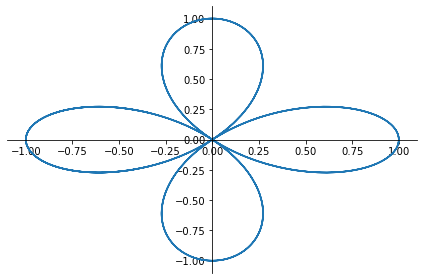

: 

In [ ]:
from sympy import cos, sin, plot_parametric
from sympy.abc import t

xfun = cos(2*t) * cos(t)
yfun = cos(2*t) * sin(t)

plot_parametric((xfun, yfun));

# Symbolic Math [10pt]


Find the derivative of $f(x)=Ae^{-cos(x)}$ with respect to x.

In [ ]:
from sympy.abc import x, A
from sympy import exp, cos, diff

fx = A * exp(-cos(x))
diff(fx, x)

A*exp(-cos(x))*sin(x)

: 

Find the roots of the equation $x^2 + x = 12$

In [ ]:
from sympy.abc import x
from sympy import solve, Eq

eqn = Eq(x**2 + x, 12)
print(f"Roots: {solve(eqn)}")

Roots: [-4, 3]


: 

# `searchinfile()`  [file, string, list, for (or list comprehension)]  [20pt]

- Define searchinfile(filename,keyword) function in a python file `searchinfile.py`
- Your function should return a list of the line numbers where the keyword 
  appears (case insensitively) in that file.

In [ ]:
# Do not make any changes to the code within this Cell.
# After completing your searchinfile.py file, run this Cell to produce the test-case print-outs.

%load_ext autoreload
%autoreload 2
 
# Create some example files.
with open('searchinfile_sample1.txt', 'w') as f: f.write('apple\norange\nbanana\nraspberry\nstrawberry')
with open('searchinfile_sample2.txt', 'w') as f: f.write('cherry\nblueberry\nelderberry')
    
import os;
if os.path.exists('searchinfile.py'):
    import searchinfile
    # this test case should print [2]
    print( searchinfile.searchinfile('searchinfile_sample1.txt', 'orange') )
    
    # this test case should print [4, 5]
    print( searchinfile.searchinfile('searchinfile_sample1.txt', 'BERRY') )

    # this test case should print []
    print( searchinfile.searchinfile('searchinfile_sample1.txt', 'watermelon') )
    
    # this test case should print [2, 3]
    print( searchinfile.searchinfile('searchinfile_sample2.txt', 'berry') )

[2]
[4, 5]
[]
[2, 3]


: 